### Project Title - Baseball Case Study

Problem Statement - This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input Features - Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output Required - Predict Number of Wins in the new season

### Importing Basic Libraries and Basic EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [7]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<Axes: >

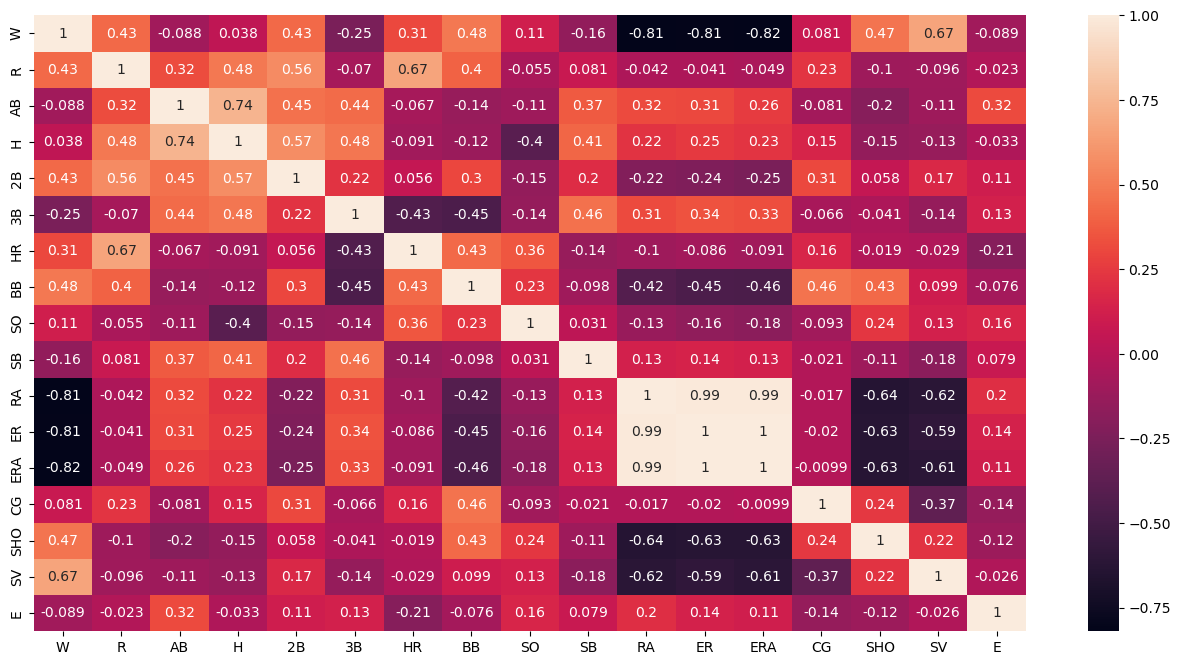

In [9]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

The Analysis of the Heat Map presents following findings -

AB - This feature is not Correlated with Wins 

2B - This feature is not Correlated with Wins 

3B - This feature is not Correlated with Wins 

HR - This feature is Corelated with Wins but also corelated with runs

RA - This feature is a measure of rate at which runs are allowed which is opposite of wins

ER - This is similar is to RA

CG - This feature is not correlated 

SV - This feature is not correlated 

### Checking for Skewness and Outliers and removing them

In [4]:
skewness = df.skew()
print(skewness)

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64


In [6]:
total_features = len(df.select_dtypes(include='number').columns)
print("Total Number of Numeric Features: ", total_features)

Total Number of Numeric Features:  17


In [7]:
skew_features = len(skewness[abs(skewness) > 0.5])
print("Significantly Skewed Features:", skew_features)

Significantly Skewed Features: 7


In [15]:
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

W     -0.167715
R      0.667934
AB     0.250244
H      0.621789
2B     0.187929
3B    -0.439240
HR     0.103224
BB    -0.051741
SO    -0.486742
SB    -0.168682
RA    -0.242397
ER    -0.279346
ERA   -0.312583
CG     0.487303
SHO   -0.646300
SV     0.298835
E      0.565896
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  4


In [17]:
from scipy.stats import zscore
z_score = abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(30, 17)
(29, 17)


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()
sc.fit(df_final)
df=sc.transform(df_final)
df=pd.DataFrame(df,columns=df_final.columns)

In [20]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.357337,0.951123,0.821227,1.721335,1.730449,0.971417,-0.743657,-1.627932,-2.944342,0.937209,-0.628637,-0.463821,-0.462607,-0.507316,-0.716564,1.582235,-0.425590
1,0.298233,0.360950,-0.710044,-0.951607,0.114703,1.106821,-0.112883,-0.450290,0.154616,-0.495204,0.204086,0.281208,0.288675,-0.507316,0.319320,0.274875,-0.592334
2,0.106928,-0.235176,-1.092517,-0.085799,1.970616,-0.106294,-0.666369,1.224055,-0.905917,0.249582,-0.643402,-0.721440,-0.602131,2.503691,-0.148771,-0.683170,-1.216047
3,-0.392802,-1.343608,0.215040,-0.345758,-0.847430,-0.314134,-0.861257,-1.167282,-0.163960,-0.600078,0.217586,0.142653,0.095991,1.381986,-0.417752,-0.830075,0.555158
4,-0.601964,0.209042,1.262688,2.025415,0.909496,1.420121,-0.292486,-0.141365,0.106810,0.121113,1.502329,1.476638,1.419202,1.381986,0.319320,-1.132502,-0.592334
5,0.667389,1.749303,0.704701,-0.048909,-0.187398,-1.335456,1.636557,1.557533,-0.203073,-0.876382,0.177026,0.267448,0.203561,-0.074035,-2.401704,0.652706,-0.028438
6,0.106928,0.722519,-0.461045,-0.552165,-1.510166,-1.186470,1.773819,-0.873299,0.780007,-2.174807,0.109037,0.184444,0.246222,-1.238852,-0.148771,0.012744,-1.406928
7,0.009497,-0.812925,-0.461045,-0.308435,0.177121,0.180078,0.266633,-0.509465,0.586962,0.291411,-0.613894,-0.419116,-0.439567,-0.947648,0.319320,2.010610,0.123110
8,-0.189073,1.436049,1.786764,1.687287,1.271269,0.269607,0.062188,0.284192,-0.998914,-0.443885,0.894325,0.827932,0.782652,-0.074035,-0.148771,-0.397391,0.270775
9,0.757025,1.495379,-0.097026,0.352884,0.240216,0.180078,0.432562,0.724127,-0.144445,0.831299,0.639739,0.644964,0.641439,0.706984,-0.417752,0.274875,1.682651


### Dataset has been Scalled for Usage

Seperate Dependent and Independent Feature from Dataset

In [24]:
X = df.drop(['W'], axis=1)
y = df[['W']]
print((X.shape),(y.shape))

(29, 16) (29, 1)


In [21]:
#Feature Importance

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

In [25]:
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\cws\anaconda3\update\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[0.05359219 0.01178893 0.01704984 0.02477152 0.01042346 0.03636765
 0.02105156 0.02750115 0.01393173 0.18288992 0.20414417 0.19610061
 0.01328135 0.01658173 0.1540159  0.01650828]


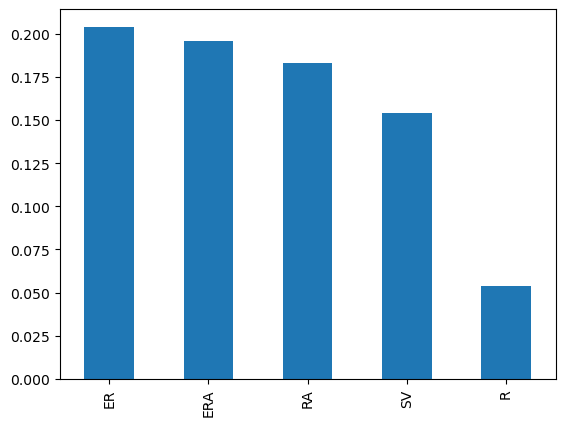

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

Plotted Best 5 Graph of Features of Importances 

<Axes: xlabel='W', ylabel='R'>

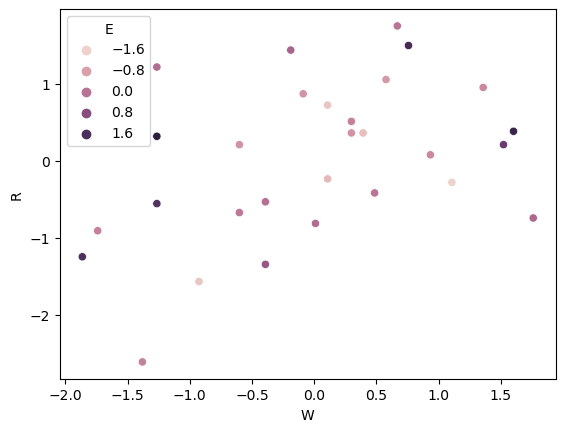

In [29]:
sns.scatterplot(x='W',y='R',hue='E',data=df)

<Axes: xlabel='W', ylabel='ER'>

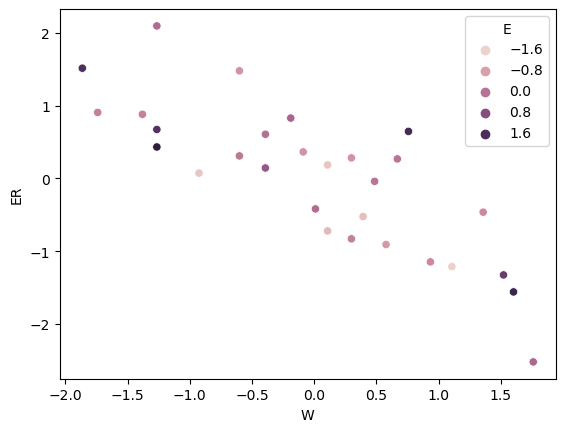

In [30]:
sns.scatterplot(x='W',y='ER',hue='E',data=df)

<Axes: xlabel='W', ylabel='ERA'>

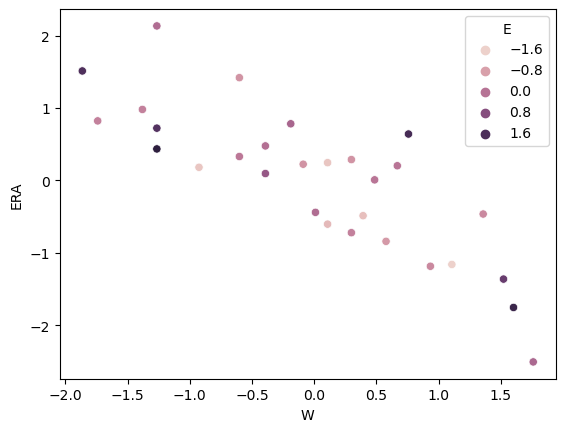

In [31]:
sns.scatterplot(x='W',y='ERA',hue='E',data=df)

<Axes: xlabel='W', ylabel='RA'>

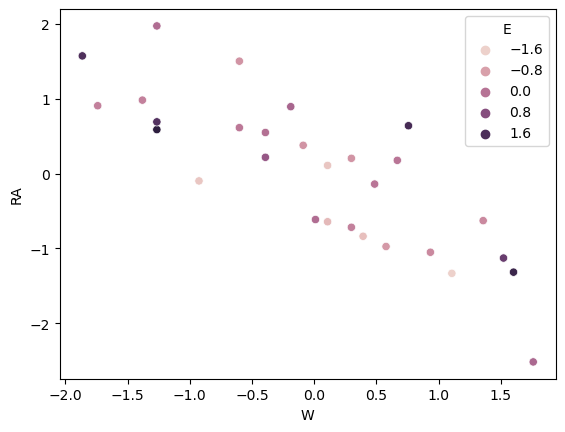

In [32]:
sns.scatterplot(x='W',y='RA',hue='E',data=df)

<Axes: xlabel='W', ylabel='SV'>

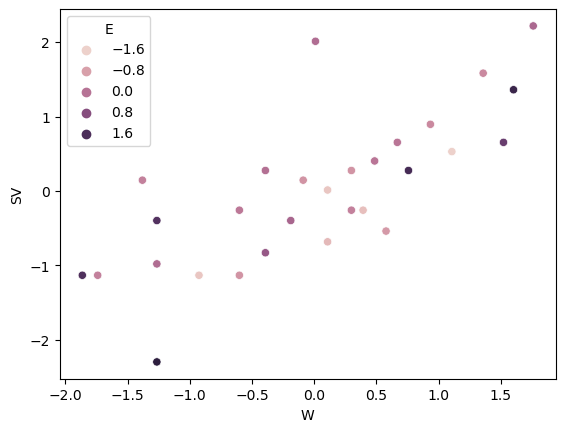

In [33]:
sns.scatterplot(x='W',y='SV',hue='E',data=df)

### Model Testing

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
#Model 1
from sklearn.linear_model import LinearRegression
max_r_score = 0
final_r_state = None

for r_state in range(42, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state, test_size=0.20)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 Score to Corresponding Random State:", r_state, " is:", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state

print()
print()
print("max r2 Score corresponding to:", final_r_state, " is ", max_r_score)

r2 Score to Corresponding Random State: 42  is: 0.47363607798118434
r2 Score to Corresponding Random State: 43  is: 0.26769926489672846
r2 Score to Corresponding Random State: 44  is: 0.7659005830863914
r2 Score to Corresponding Random State: 45  is: 0.3593504264712579
r2 Score to Corresponding Random State: 46  is: 0.7545048548043229
r2 Score to Corresponding Random State: 47  is: 0.1988315092258739
r2 Score to Corresponding Random State: 48  is: 0.3317393222592929
r2 Score to Corresponding Random State: 49  is: 0.3590468203831466
r2 Score to Corresponding Random State: 50  is: 0.868638248646434
r2 Score to Corresponding Random State: 51  is: 0.3026783545066164
r2 Score to Corresponding Random State: 52  is: 0.144908611157457
r2 Score to Corresponding Random State: 53  is: 0.7280355999380248
r2 Score to Corresponding Random State: 54  is: 0.5807443775343117
r2 Score to Corresponding Random State: 55  is: 0.8898620242377956
r2 Score to Corresponding Random State: 56  is: 0.865797929523

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_r2_mean = cross_val_score(regr, X, y, cv=5, scoring="r2").mean()
print("Cross-validated R2 mean:", cross_val_r2_mean)

Cross-validated R2 mean: 0.6086937303094263


In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
#Model 2
from sklearn.svm import SVR
max_r_score = 0
final_r_state = None

for r_state in range(42, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state, test_size=0.20)
    svr = SVR()
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 Score to Corresponding Random State:", r_state, " is:", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state

print()
print()
print("max r2 Score corresponding to:", final_r_state, " is ", max_r_score)

r2 Score to Corresponding Random State: 42  is: 0.35158600907950377
r2 Score to Corresponding Random State: 43  is: 0.07513394024130149
r2 Score to Corresponding Random State: 44  is: 0.40179280396522377
r2 Score to Corresponding Random State: 45  is: 0.11856295231717828
r2 Score to Corresponding Random State: 46  is: 0.5192568875254584
r2 Score to Corresponding Random State: 47  is: 0.6017187076598802
r2 Score to Corresponding Random State: 48  is: 0.48125024208247635
r2 Score to Corresponding Random State: 49  is: -1.4274778284507001
r2 Score to Corresponding Random State: 50  is: 0.20369037033694637
r2 Score to Corresponding Random State: 51  is: 0.39669242389631143
r2 Score to Corresponding Random State: 52  is: 0.31877277154482864
r2 Score to Corresponding Random State: 53  is: 0.40136780792016113
r2 Score to Corresponding Random State: 54  is: 0.6202193528420707
r2 Score to Corresponding Random State: 55  is: 0.6102390654045062
r2 Score to Corresponding Random State: 56  is: 0.25

In [49]:
cross_val_r2_mean = cross_val_score(svr, X, y, cv=5, scoring="r2").mean()
print("Cross-validated R2 mean:", cross_val_r2_mean)

Cross-validated R2 mean: -0.20562227103820296


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
#Model 3
max_r_score = 0
final_r_state = None

for r_state in range(42, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state, test_size=0.20)
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 Score to Corresponding Random State:", r_state, " is:", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state

print()
print()
print("max r2 Score corresponding to:", final_r_state, " is ", max_r_score)

r2 Score to Corresponding Random State: 42  is: 0.4088457445886723
r2 Score to Corresponding Random State: 43  is: 0.15742160586823473
r2 Score to Corresponding Random State: 44  is: 0.5724346632778521
r2 Score to Corresponding Random State: 45  is: 0.036560821385120734
r2 Score to Corresponding Random State: 46  is: 0.8166490006769387
r2 Score to Corresponding Random State: 47  is: 0.7172464471435053
r2 Score to Corresponding Random State: 48  is: 0.6461075004292683
r2 Score to Corresponding Random State: 49  is: -0.55651454646267
r2 Score to Corresponding Random State: 50  is: 0.22338040439191775
r2 Score to Corresponding Random State: 51  is: 0.4685583373764828
r2 Score to Corresponding Random State: 52  is: 0.4173499907500786
r2 Score to Corresponding Random State: 53  is: 0.6714076984840647
r2 Score to Corresponding Random State: 54  is: 0.6413677005860791
r2 Score to Corresponding Random State: 55  is: 0.5323679780976687
r2 Score to Corresponding Random State: 56  is: 0.310980846

In [55]:
cross_val_r2_mean = cross_val_score(rf, X, y, cv=5, scoring="r2").mean()
print("Cross-validated R2 mean:", cross_val_r2_mean)

Cross-validated R2 mean: -0.6030583229112122


In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
#Model No 4
max_r_score = 0
final_r_state = None

for r_state in range(42, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state, test_size=0.20)
    knr = KNeighborsRegressor()
    knr.fit(X_train, y_train)
    y_pred = knr.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 Score to Corresponding Random State:", r_state, " is:", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state

print()
print()
print("max r2 Score corresponding to:", final_r_state, " is ", max_r_score)

r2 Score to Corresponding Random State: 42  is: 0.35792321359892165
r2 Score to Corresponding Random State: 43  is: 0.7664776865109854
r2 Score to Corresponding Random State: 44  is: 0.8066961476987153
r2 Score to Corresponding Random State: 45  is: 0.372789760065693
r2 Score to Corresponding Random State: 46  is: 0.6368602813775619
r2 Score to Corresponding Random State: 47  is: 0.5735314041791235
r2 Score to Corresponding Random State: 48  is: 0.6819291862786383
r2 Score to Corresponding Random State: 49  is: -0.8434561759571173
r2 Score to Corresponding Random State: 50  is: 0.10589158536966414
r2 Score to Corresponding Random State: 51  is: 0.7490828809786199
r2 Score to Corresponding Random State: 52  is: 0.7788230396741694
r2 Score to Corresponding Random State: 53  is: 0.5863178217901718
r2 Score to Corresponding Random State: 54  is: 0.6621399808635647
r2 Score to Corresponding Random State: 55  is: 0.6948628376951806
r2 Score to Corresponding Random State: 56  is: 0.5779152569

In [59]:
cross_val_r2_mean = cross_val_score(knr, X, y, cv=5, scoring="r2").mean()
print("Cross-validated R2 mean:", cross_val_r2_mean)

Cross-validated R2 mean: 0.023833703464934897


In [60]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
#Model 5
max_r_score = 0
final_r_state = None

for r_state in range(42, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=r_state, test_size=0.20)
    dtr = DecisionTreeRegressor()
    dtr.fit(X_train, y_train)
    y_pred = dtr.predict(X_test)
    r2_scr = r2_score(y_test, y_pred)
    print("r2 Score to Corresponding Random State:", r_state, " is:", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state

print()
print()
print("max r2 Score corresponding to:", final_r_state, " is ", max_r_score)

r2 Score to Corresponding Random State: 42  is: -0.7236454436953834
r2 Score to Corresponding Random State: 43  is: -0.9959724318330987
r2 Score to Corresponding Random State: 44  is: 0.03228435427541165
r2 Score to Corresponding Random State: 45  is: -0.32292423457348707
r2 Score to Corresponding Random State: 46  is: 0.5390858861612675
r2 Score to Corresponding Random State: 47  is: 0.6014262581593447
r2 Score to Corresponding Random State: 48  is: -0.44824855402868913
r2 Score to Corresponding Random State: 49  is: -1.2699074990480526
r2 Score to Corresponding Random State: 50  is: -0.6206985319237512
r2 Score to Corresponding Random State: 51  is: -0.16813257850076835
r2 Score to Corresponding Random State: 52  is: -0.8824109164263758
r2 Score to Corresponding Random State: 53  is: -0.8476187155553665
r2 Score to Corresponding Random State: 54  is: -1.1551533622855241
r2 Score to Corresponding Random State: 55  is: 0.1915868116346534
r2 Score to Corresponding Random State: 56  is: 

In [62]:
cross_val_r2_mean = cross_val_score(dtr, X, y, cv=5, scoring="r2").mean()
print("Cross-validated R2 mean:", cross_val_r2_mean)

Cross-validated R2 mean: -2.1769144679240546


In [63]:
import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [64]:
#HyperParameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

#DefineGrid

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [65]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [67]:
random_cv.fit(X_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[16:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "max_depth", "min_child_weight" } are not used.



XGBRegressor(base_score=0.25, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [68]:
regressor=xgboost.XGBRegressor()

In [69]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [71]:
y_pred=regressor.predict(X_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.3072610226342276
RMSE is :  0.6287071930622764


### Selecting the Final Model 

Reason for Selection - Among all the options, LinearRegression corresponding to random state 67 is the clear winner with the highest R-squared value, indicating that it explains approximately 90.7% of the variance in the target variable. This suggests that this model has the best predictive performance and fits the data well.

In [ ]:
#Choosing Random State 67 as it gives best Results
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 67,test_size=0.20)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [74]:
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9074212626440621
RMSE is :  0.38395683383634877


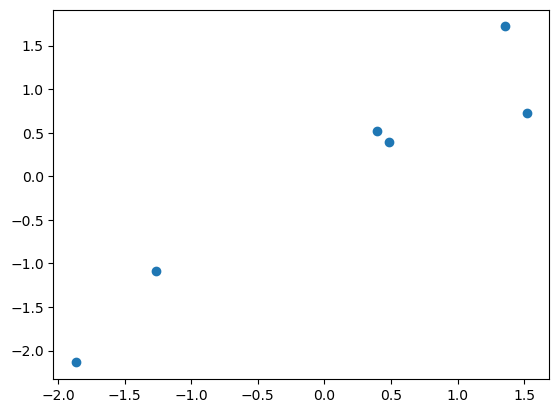

In [75]:
plt.scatter(y_test,y_pred)

As per aboved graph shows test and Predicted Values are well Distributed

### Dumping The Project

In [78]:
import pickle

In [80]:
pickle.dump(lr,open('dr_baseball.pkl','wb'))

### End of Project